In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold, LeavePOut, LeaveOneOut, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
df = pd.read_csv("./multiple_linear_regression_dataset.csv")

In [ ]:
df.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         20 non-null     int64
 1   experience  20 non-null     int64
 2   income      20 non-null     int64
dtypes: int64(3)
memory usage: 608.0 bytes


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,20.0,39.65,10.027725,23.0,31.50,40.0,47.0,58.0
experience,20.0,6.20,4.124382,1.0,3.75,5.0,9.0,17.0
income,20.0,40735.50,8439.797625,27840.0,35452.50,40190.0,45390.0,63600.0


## Exploratory Data Analysis (EDA)

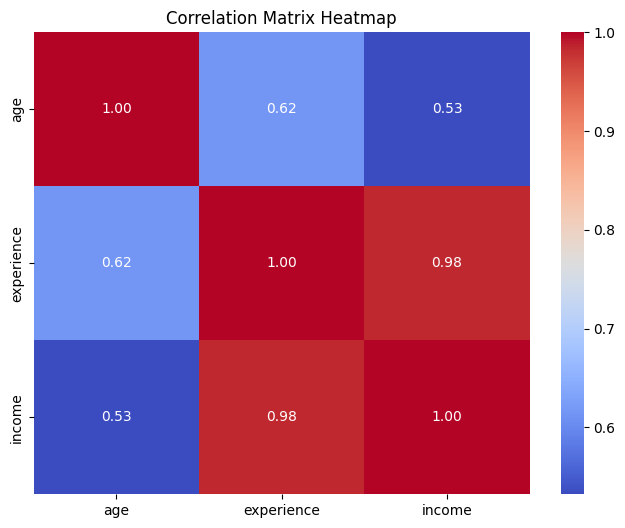

In [ ]:
#Correlation Matrix and Heatmap
corr = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

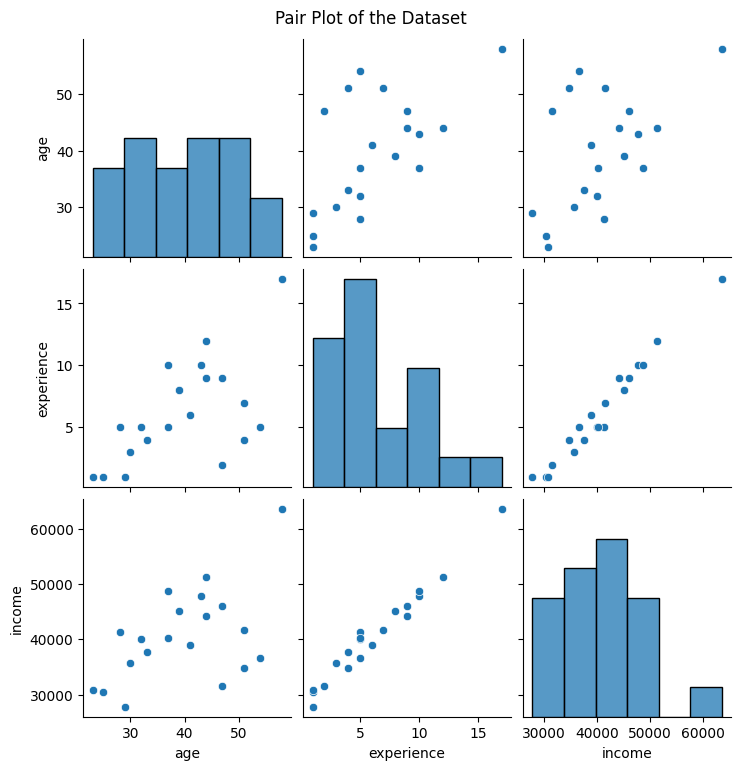

In [ ]:
#Pair Plot
sns.pairplot(df)
plt.suptitle('Pair Plot of the Dataset', y=1.02)
plt.show()

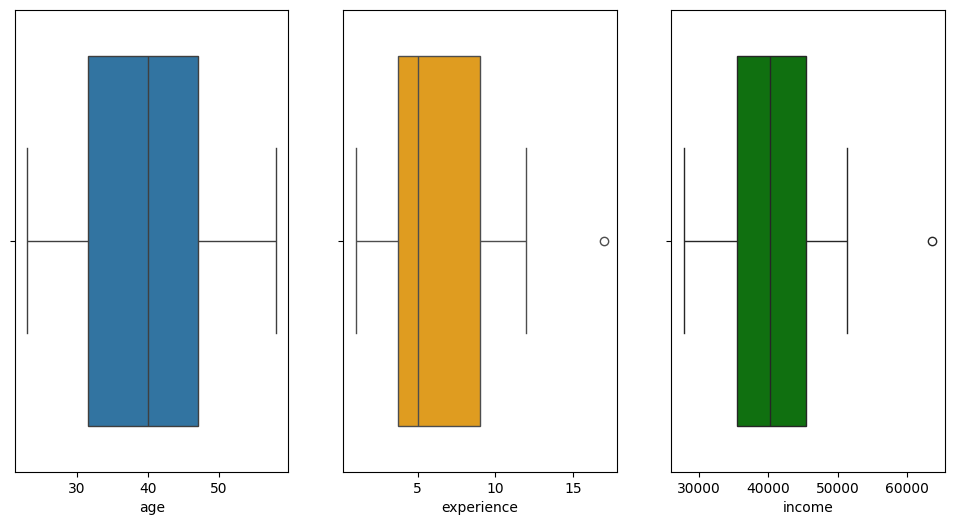

In [ ]:
# Box plot for detecting outliers in each column
fig, ax = plt.subplots(1, 3, figsize = (12, 6))

# Box plot for the 'age' column
sns.boxplot(x=df['age'], ax = ax[0])

# Box plot for the 'experience' column
sns.boxplot(x=df['experience'], color='orange', ax = ax[1])

# Box plot for the 'income' column
sns.boxplot(x=df['income'], color='green', ax = ax[2])

plt.show()

In [ ]:
X = df.drop('income', axis = 1)
y = df['income']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)

## Model Selection and Training



In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

## Model Evaluation

In [ ]:
# Test overfitting
print("LinearRegression Train Score: ", model.score(X_train, y_train))
print("LinearRegression Test score: ", model.score(X_test, y_test))

LinearRegression Train Score:  0.9741213876189155
LinearRegression Test score:  0.9387098237077887


In [ ]:
# k-Fold
k_folds = KFold(n_splits= 5, shuffle= True, random_state=42)
scores = cross_val_score(model,X, y, cv=k_folds)
print(f"Average CV score: {scores.mean()}")

Average CV score: 0.9140565720583004


In [ ]:
# Leave-P-Out(LPO)
lpo = LeavePOut(p = 5)
print(lpo)
scores = cross_val_score(model,X, y, cv=lpo, n_jobs = -1)
print(f"Average CV score: {scores.mean()}")

LeavePOut(p=5)
Average CV score: 0.9343615324367374


In [ ]:
# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:0.2f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:0.2f}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse:0.2f}")
print(f"Root Mean Squared Error: {mean_squared_error(y_test, y_pred, squared = False):0.2f}")

# R-squared Score
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2:0.2f}")

Mean Squared Error: 753796.77
Mean Absolute Error: 797.91
Root Mean Squared Error: 868.21
Root Mean Squared Error: 868.21
R-squared Score: 0.94
